In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from google.colab import drive

drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# !ls "/content/drive/My Drive"
df = pd.read_csv('/gdrive/My Drive/Data Science - Group 11/global_power_plant_database.csv')

df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


[Text(0, 0, 'Solar'),
 Text(0, 0, 'Hydro'),
 Text(0, 0, 'Wind'),
 Text(0, 0, 'Gas'),
 Text(0, 0, 'Coal'),
 Text(0, 0, 'Oil'),
 Text(0, 0, 'Biomass'),
 Text(0, 0, 'Waste'),
 Text(0, 0, 'Nuclear'),
 Text(0, 0, 'Geothermal'),
 Text(0, 0, 'Storage'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Cogeneration'),
 Text(0, 0, 'Petcoke'),
 Text(0, 0, 'Wave and Tidal')]

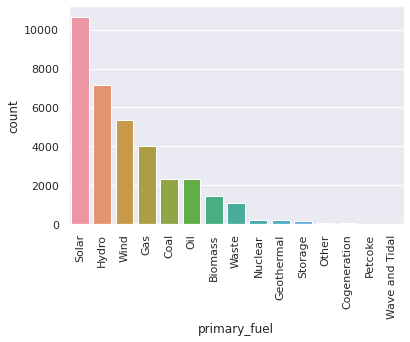

In [3]:
# Exploratory Data Analysis

df['primary_fuel'].unique()

# Barchart to determine plant distribution by type
sns.set(color_codes=True)
plot = sns.countplot(x="primary_fuel", data=df, order = df['primary_fuel'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [4]:
df[df['primary_fuel'] == "Solar"].describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,10665.000000,10665.000000,10665.000000,3500.000000,3450.000000,633.000000,937.000000,1252.000000,1819.000000,2299.000000,2726.000000,3260.000000,7633.000000,7906.000000,8272.000000,8605.000000,10665.000000
mean,17.657039,37.712596,-0.781163,2015.690287,2018.876812,13.954062,18.128063,21.622091,21.401820,24.180779,23.430987,21.979277,34.646962,35.228476,34.975659,34.599176,32.590749
std,41.939412,14.456022,76.043135,2.952006,0.585077,45.172392,72.907004,102.535522,91.564976,87.835224,75.133900,69.463887,80.909089,83.598470,83.639603,83.506455,78.788926
min,1.000000,-40.771900,-159.762100,1987.000000,2013.000000,-0.116000,-0.064000,0.000000,-41.889000,-0.394000,0.000000,0.000000,1.120000,0.870000,1.210000,0.570000,0.570000
25%,2.600000,34.543900,-75.808300,2014.000000,2019.000000,1.653300,1.624000,1.906500,1.933235,1.999500,2.098500,2.103750,6.150000,5.950000,5.657500,5.420000,4.110000
50%,5.800000,40.086000,0.809500,2016.000000,2019.000000,2.835000,3.029000,3.663500,3.969000,4.231000,4.537500,4.291500,13.500000,13.410000,12.480000,12.030000,10.130000
75%,18.000000,46.355000,72.388000,2018.000000,2019.000000,8.138000,8.544000,9.082250,9.495500,9.889500,9.559750,9.564500,33.730000,33.670000,33.020000,32.780000,31.500000
max,1021.000000,67.665800,153.110000,2020.000000,2019.000000,675.525000,1105.857000,2203.325000,2290.606000,2022.002000,1335.727000,1255.722000,1901.610000,2056.060000,2069.290000,2012.710000,1876.420000


In [5]:
# Explore data about geothermal plants

df_gt = df[df['primary_fuel'] == 'Geothermal']


df_gt.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,189.000000,189.000000,189.000000,143.000000,79.000000,58.000000,59.000000,62.000000,64.000000,63.000000,63.000000,65.000000,0.0,0.0,0.0,0.0,158.000000
mean,67.130952,29.559103,-12.623095,1998.005683,2018.582278,261.721122,264.049305,267.354919,264.499344,256.944270,254.503254,239.164692,NaN,NaN,NaN,NaN,380.352468
std,114.640890,20.703692,100.988530,12.245848,0.928296,621.357150,589.304270,576.427069,580.935179,590.110359,586.914846,540.487651,NaN,NaN,NaN,NaN,682.548458
min,1.000000,-38.666400,-154.888400,1966.000000,2016.000000,0.000000,1.525000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,18.200000,19.479000,-115.616700,1989.333333,2019.000000,75.752250,77.418000,74.106000,71.566750,64.503500,74.709500,67.933000,NaN,NaN,NaN,NaN,111.380000
50%,30.000000,37.884500,10.800300,1998.000000,2019.000000,129.643850,138.508000,126.935000,136.240000,124.895000,124.602000,115.179000,NaN,NaN,NaN,NaN,150.825000
75%,80.000000,41.482800,36.333800,2009.000000,2019.000000,322.267250,310.149000,327.845250,275.044250,306.015500,304.042500,300.512000,NaN,NaN,NaN,NaN,396.635000
max,1163.000000,65.703500,176.727200,2019.000000,2019.000000,4784.939000,4591.707000,4531.168000,4628.971000,4667.659000,4674.308000,4351.429000,NaN,NaN,NaN,NaN,6286.450000


In [6]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 16.6 MB 39.5 MB/s 
     |████████████████████████████████| 7.8 MB 45.1 MB/s 


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


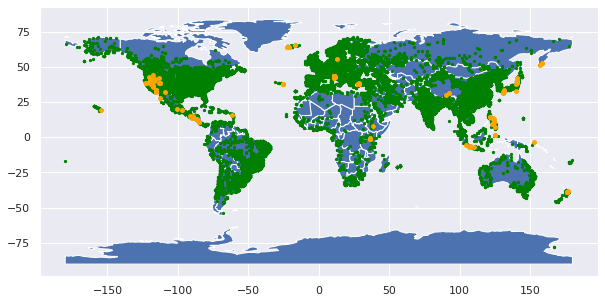

In [7]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df_everythingelse = df[df['primary_fuel'] != 'Geothermal']

geometry = [Point(xy) for xy in zip(df_gt['longitude'], df_gt['latitude'])]
gdf = GeoDataFrame(df_gt, geometry=geometry)
gdf2 = GeoDataFrame(df_everythingelse, geometry = [Point(xy) for xy in zip(df_everythingelse['longitude'], df_everythingelse['latitude'])])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

%pylab inline
ax = world.plot(figsize(10, 6))
gdf2.plot(ax=ax, marker='o', color='green', markersize=5);
gdf.plot(ax=ax, marker='o', color='orange', markersize=15);

In [8]:
df_gdp = pd.read_csv('/gdrive/My Drive/Data Science - Group 11/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4701247.csv', skiprows=3)

df_gdp = df_gdp.loc[:, ~df_gdp.columns.str.contains('^Unnamed')]
df_gdp["2021"] = df_gdp["2021"].fillna(df_gdp["2020"])

df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,2.496648e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,3.652148e+10,4.182834e+10,4.486261e+10,4.947892e+10,5.351484e+10,6.960079e+10,8.605778e+10,9.164915e+10,9.112455e+10,1.034158e+11,1.153450e+11,1.346714e+11,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11,1.601340e+11,1.362973e+11,1.525183e+11,1.861446e+11,2.041398e+11,2.175386e+11,2.532240e+11,2.734028e+11,2.382554e+11,2.365269e+11,2.401201e+11,2.696369e+11,2.684137e+11,2.821850e+11,2.658141e+11,2.621722e+11,2.839254e+11,2.588186e+11,2.648698e+11,3.526585e+11,4.388338e+11,5.122111e+11,5.759214e+11,6.611793e+11,7.082869e+11,7.192167e+11,8.604783e+11,9.644185e+11,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010931e+10,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11,1.142627e+11,1.165073e+11,1.074975e+11,1.103218e+11,1.089435e+11,1.017688e+11,1.218021e+11,1.174571e+11,1.182823e+11,9.882637e+10,8.628174e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,1.375210e+11,1.404103e+11,1.480128e+11,1.769380e+11,2.046445e+11,2.540926e+11,3.105575e+11,3.933052e+11,4.617914e+11,5.664808e+11,5.070436e+11,5.915958e+11,6.709830e+11,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169956e+10,1.094365e+11,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,

In [ ]:
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,2.496648e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,3.652148e+10,4.182834e+10,4.486261e+10,4.947892e+10,5.351484e+10,6.960079e+10,8.605778e+10,9.164915e+10,9.112455e+10,1.034158e+11,1.153450e+11,1.346714e+11,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11,1.601340e+11,1.362973e+11,1.525183e+11,1.861446e+11,2.041398e+11,2.175386e+11,2.532240e+11,2.734028e+11,2.382554e+11,2.365269e+11,2.401201e+11,2.696369e+11,2.684137e+11,2.821850e+11,2.658141e+11,2.621722e+11,2.839254e+11,2.588186e+11,2.648698e+11,3.526585e+11,4.388338e+11,5.122111e+11,5.759214e+11,6.611793e+11,7.082869e+11,7.192167e+11,8.604783e+11,9.644185e+11,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010931e+10,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11,1.142627e+11,1.165073e+11,1.074975e+11,1.103218e+11,1.089435e+11,1.017688e+11,1.218021e+11,1.174571e+11,1.182823e+11,9.882637e+10,8.628174e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,1.375210e+11,1.404103e+11,1.480128e+11,1.769380e+11,2.046445e+11,2.540926e+11,3.105575e+11,3.933052e+11,4.617914e+11,5.664808e+11,5.070436e+11,5.915958e+11,6.709830e+11,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169956e+10,1.094365e+11,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,

In [ ]:
df_gdp['Country Name'].unique()

df_gdp.describe().T

,count,mean,std,min,25%,50%,75%,max
1960,133.0,7.144431e+10,2.139668e+11,1.201201e+07,5.083344e+08,2.760747e+09,3.115666e+10,1.392053e+12
1961,135.0,7.227617e+10,2.216008e+11,1.159201e+07,5.111424e+08,2.899655e+09,2.963396e+10,1.448393e+12
1962,137.0,7.591834e+10,2.362059e+11,9.122751e+06,5.317365e+08,2.814319e+09,2.906074e+10,1.550299e+12
1963,137.0,8.187843e+10,2.541180e+11,1.084010e+07,5.161478e+08,3.540403e+09,3.368764e+10,1.671347e+12
1964,137.0,8.993111e+10,2.779094e+11,1.271247e+07,5.425784e+08,3.405333e+09,3.097945e+10,1.829999e+12
1965,148.0,9.131323e+10,2.918706e+11,1.359393e+07,5.863716e+08,3.038595e+09,2.848916e+10,1.993587e+12
1966,151.0,1.016025e+11,3.195597e+11,1.446908e+07,6.380995e+08,3.170500e+09,3.024408e+10,2.163555e+12
1967,155.0,1.048530e+11,3.369514e+11,1.583518e+07,6.264909e+08,3.384063e+09,3.076550e+10,2.302168e+12
1968,160.0,1.099793e+11,3.588648e+11,1.460000e+07,6.454036e+08,4.064739e+09,3.420281e+10,2.484824e+12
1969,160.0,1.216207e+11,3.949848e+11,1.585000e+07,6.912229e+08,4.759106e+09,3.741952e+10,2.740743e+12


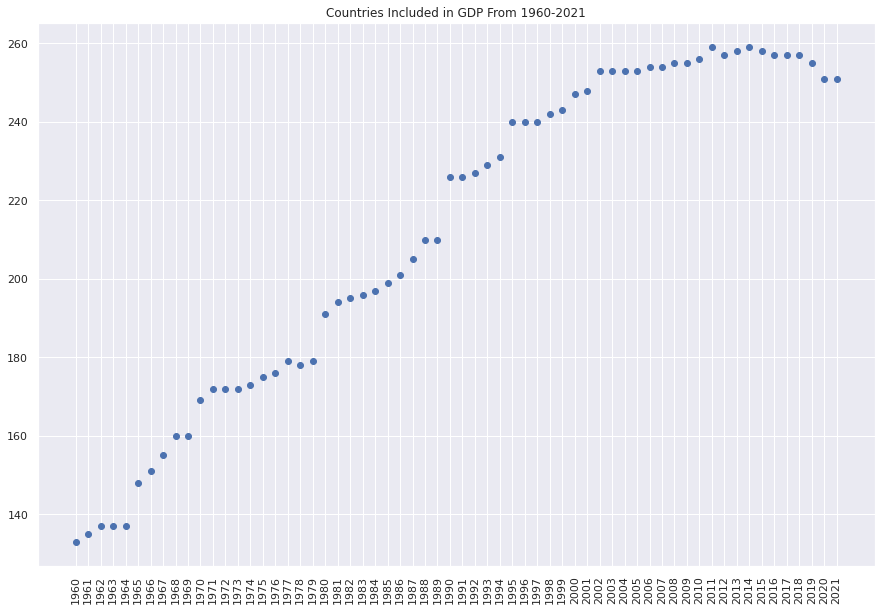

In [ ]:
#number of countries for each year in the dataset

gdp_count = pd.DataFrame(df_gdp.describe().T["count"])

plt.figure(figsize=(15,10))
plt.plot()
plt.xticks(rotation=90)
plt.title('Countries Included in GDP From 1960-2021')
plt.scatter(gdp_count.index, gdp_count["count"])
plt.show()

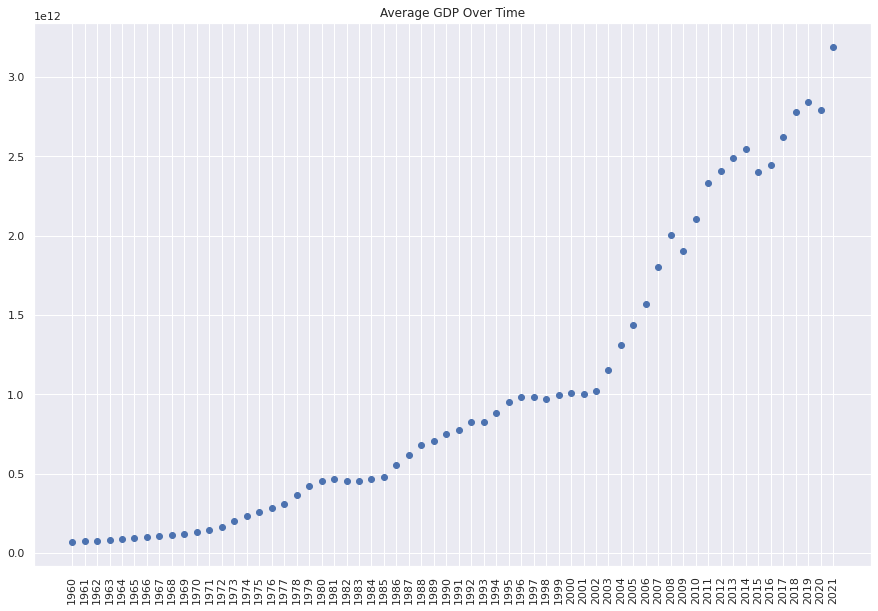

In [ ]:
#average gdp across the years

gdp_avg = pd.DataFrame(df_gdp.describe().T["mean"])

plt.figure(figsize=(15,10)) 
plt.plot()
plt.xticks(rotation=90)
plt.title('Average GDP Over Time')
plt.scatter(gdp_avg.index, gdp_avg["mean"])
plt.show()

<ipython-input-13-cc3a9d701b7c>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp_top5 = df_gdp[gdp_top['Index'].isin(topindex)]


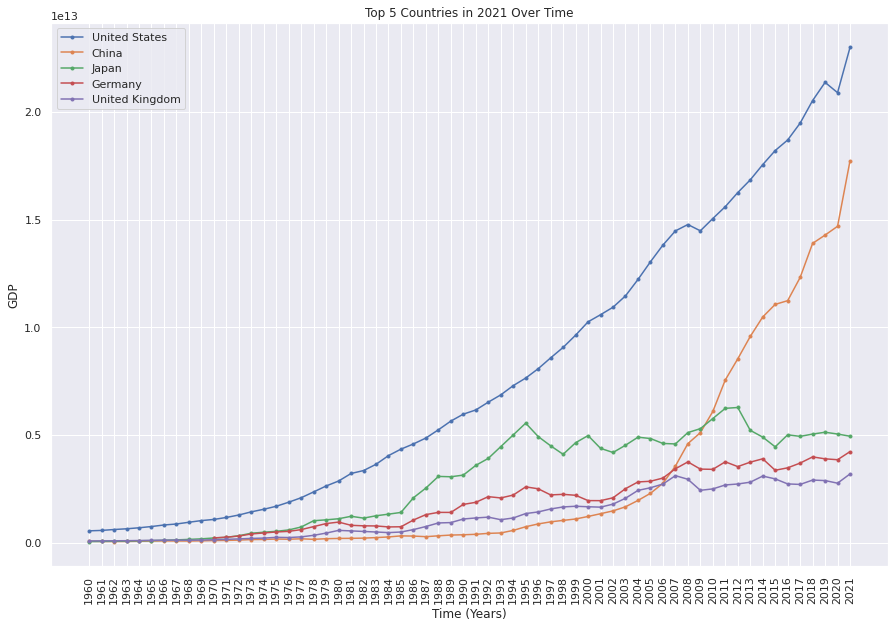

In [ ]:
#top 5 countries in terms of gdp in 2021

gdp_top = pd.DataFrame(df_gdp.describe().T["mean"])

gdp_top = df_gdp[['Country Name', '2021']].sort_values('2021',ascending=False)
gdp_top["Index"] = gdp_top.index
topindex = [251, 40, 119, 55, 81]
gdp_top5 = df_gdp[gdp_top['Index'].isin(topindex)] 
gdp_top5

gdp_us = pd.DataFrame(gdp_top5.T[251])
gdp_us = gdp_us.iloc[4:]
gdp_us["United States"] = gdp_us[251]
gdp_us["Index"] = gdp_us[251].index
gdp_us = gdp_us[["United States", "Index"]]

gdp_china = pd.DataFrame(gdp_top5.T[40])
gdp_china = gdp_china.iloc[4:]
gdp_china["China"] = gdp_china[40]
gdp_china["Index"] = gdp_china[40].index
gdp_china = gdp_china[["China", "Index"]]

gdp_japan = pd.DataFrame(gdp_top5.T[119])
gdp_japan = gdp_japan.iloc[4:]
gdp_japan["Japan"] = gdp_japan[119]
gdp_japan["Index"] = gdp_japan[119].index
gdp_japan = gdp_japan[["Japan", "Index"]]

gdp_ger = pd.DataFrame(gdp_top5.T[55])
gdp_ger = gdp_ger.iloc[4:]
gdp_ger["Germany"] = gdp_ger[55]
gdp_ger["Index"] = gdp_ger[55].index
gdp_ger = gdp_ger[["Germany", "Index"]]

gdp_uk = pd.DataFrame(gdp_top5.T[81])
gdp_uk = gdp_uk.iloc[4:]
gdp_uk["United Kingdom"] = gdp_uk[81]
gdp_uk["Index"] = gdp_uk[81].index
gdp_uk = gdp_uk[["United Kingdom", "Index"]]

gdp_uk

# gdp_top5 = gdp_top5[["Country Name", "2021"]]

# plt.figure(figsize=(15,10)) 
# plt.plot()
# plt.xticks(rotation=90)
# plt.title('Top 5 Countries Over Time')
# plt.scatter(gdp_avg.index, gdp_avg["mean"])
# plt.show()

plt.figure(figsize=(15,10))
plt.plot(gdp_us["Index"], gdp_us["United States"], label = "United States", marker='.')
plt.plot(gdp_china["Index"], gdp_china["China"], label = "China", marker='.')
plt.plot(gdp_japan["Index"], gdp_japan["Japan"], label = "Japan", marker='.')
plt.plot(gdp_ger["Index"], gdp_ger["Germany"], label = "Germany", marker='.')
plt.plot(gdp_uk["Index"], gdp_uk["United Kingdom"], label = "United Kingdom", marker='.')
plt.xticks(rotation=90)
plt.title('Top 5 Countries in 2021 Over Time')
plt.xlabel('Time (Years)')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [9]:
df_tectonic = pd.read_csv("/gdrive/My Drive/Data Science - Group 11/plate_tectonics.csv")

df_tectonic.head()

,plate,lat,lon
0,am,30.754,132.824
1,am,30.970,132.965
2,am,31.216,133.197
3,am,31.515,133.500
4,am,31.882,134.042


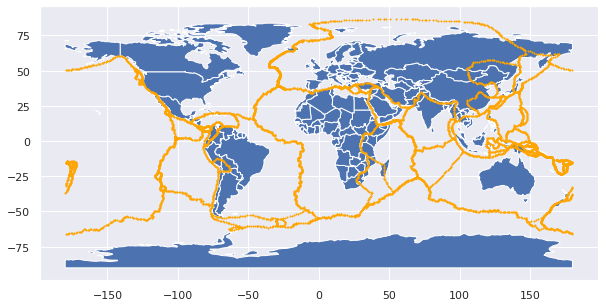

In [10]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_tectonic['lon'], df_tectonic['lat'])]
gdf3 = GeoDataFrame(df_tectonic, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf3.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='orange', markersize=0.5);

In [ ]:
# Get the distance from power plant to closest tectonic boundary
# Plot regression line between that & total output.
# Maybe also put an additional line for thresholds of other energy sources

import geopy.distance
import math

def get_min_distance(latitude, longitude):
  min_dist = 9999
  min_index = 0
  for index, row in df_tectonic.iterrows():
    distance = np.linalg.norm(np.array((latitude, longitude)) - np.array((row["lat"], row["lon"])))
    if distance < min_dist:
      min_index = index
      min_dist = distance
  return (min_index, min_dist)

In [ ]:
get_min_distance(df_gt.iloc[0]["latitude"], df_gt.iloc[0]["longitude"])

(3626, 4.41287380852886)

In [11]:
from sklearn.neighbors import KDTree, BallTree

kd = KDTree(df_tectonic[["lat", "lon"]].values, metric = 'euclidean')
distances, indices = kd.query(df_gt[["latitude", "longitude"]], k=1)
print(distances[0], indices[0])

for column in df_gt[["latitude", "longitude"]]:
    rad = np.deg2rad(df_gt[column].values)
    df_gt[f'{column}_rad'] = rad
for column in df_tectonic[["lat", "lon"]]:
    rad = np.deg2rad(df_tectonic[column].values)
    df_tectonic[f'{column}_rad'] = rad

# df_gt.head()

ball = BallTree(df_tectonic[["lat", "lon"]].values, metric = 'haversine')
distances, indices = ball.query(df_gt[["latitude", "longitude"]], k=1)
print(distances[0], indices[0])
distances_1d = []
for row in distances:
  distances_1d.append(row[0])

df_gt = df_gt.reset_index()
distance_frame = pd.DataFrame(distances_1d, columns=["Closest Plate Distance"])
df_gt = df_gt.join(distance_frame)

[4.41287381] [4702]


<ipython-input-11-08ff343957db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gt[f'{column}_rad'] = rad


[0.00813788] [9248]


In [12]:
df_gt[['name', 'Closest Plate Distance']]

,name,Closest Plate Distance
0,Nagqu Geothermal,0.008138
1,Yangbajain Geothermal,0.011192
2,Boca de Pozo Geothermal Power Plant Costa Rica,0.022412
3,Miravalles I and II Geothermal Power Plant Cos...,0.026150
4,Miravalles III Geothermal Power Plant Costa Rica,0.008251
5,Miravalles V Geothermal Power Plant Costa Rica,0.033647
6,Pailas Geothermal Power Plant Costa Rica,0.017587
7,Amager,0.016824
8,Ahuachapan Geothermal Power Plant El Salvador,0.022773
9,Berlin Geothermal Power Plant El Salvador,0.023206


-0.013593629789375283
32.5907491795593 494.89108580212405


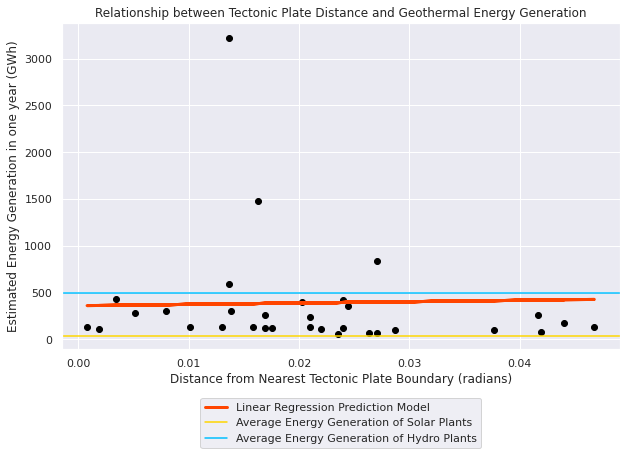

In [27]:
# Construct linear model here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

geothermal_df = df_gt[df_gt['estimated_generation_gwh_2017'].notna()]
# geothermal_df = geothermal_df.loc[:,["estimated_generation_gwh_2017", "Closest Plate Distance"]]
# geothermal_df.head()

X = geothermal_df["Closest Plate Distance"]
y = geothermal_df["estimated_generation_gwh_2017"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
lm = LinearRegression().fit(X_train, y_train)

pred_y = lm.predict(X_test)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, pred_y, color="orangered", linewidth=3, label="Linear Regression Prediction Model")
print(r2_score(y_test, pred_y))

# Get average estimated generation for solar and hydro
solar_df = df[df['primary_fuel'] == 'Solar']
solar_df = solar_df[solar_df['estimated_generation_gwh_2017'].notna()]
average_solar = solar_df['estimated_generation_gwh_2017'].mean()

hydro_df = df[df['primary_fuel'] == 'Hydro']
hydro_df = hydro_df[hydro_df['estimated_generation_gwh_2017'].notna()]
average_hydro = hydro_df['estimated_generation_gwh_2017'].mean()
print(average_solar, average_hydro)

plt.axhline(y=average_solar, color='gold', linestyle='-', label="Average Energy Generation of Solar Plants")
plt.axhline(y=average_hydro, color='deepskyblue', linestyle='-', label="Average Energy Generation of Hydro Plants")

leg = plt.legend(bbox_to_anchor=(0.5,-0.32), loc='lower center')

plt.xlabel("Distance from Nearest Tectonic Plate Boundary (radians)")
plt.ylabel("Estimated Energy Generation in one year (GWh)")
plt.title("Relationship between Tectonic Plate Distance and Geothermal Energy Generation")

plt.show()

In [ ]:
plant_series = df_gt['country_long'].value_counts()
df_plant = pd.DataFrame({'Country Name':plant_series.index, 'Total Plants': plant_series.values})

df_countries = df_gdp[["Country Name", "2021"]]
df_cluster = pd.merge(df_plant, df_countries, on='Country Name')
# df_plant
US_GDP = df_countries[df_countries["Country Name"] == "United States"]["2021"].values[0]
US_plants = df_plant[df_plant["Country Name"] == "United States of America"]["Total Plants"].values[0]
Russia_GDP = df_countries[df_countries["Country Name"] == "Russian Federation"]["2021"].values[0]
Russia_plants = df_plant[df_plant["Country Name"] == "Russia"]["Total Plants"].values[0]
Turkey_GDP = df_countries[df_countries["Country Name"] == "Turkiye"]["2021"].values[0]
Turkey_plants = df_plant[df_plant["Country Name"] == "Turkey"]["Total Plants"].values[0]

df_cluster.loc[len(df_cluster.index)] = ['United States', US_plants, US_GDP] 
df_cluster.loc[len(df_cluster.index)] = ['Russia', Russia_plants, Russia_GDP]
df_cluster.loc[len(df_cluster.index)] = ['Turkey', Turkey_plants, Turkey_GDP]

df_cluster.rename(columns={"2021":"GDP in 2021"}, inplace=True)
df_cluster

,Country Name,Total Plants,GDP in 2021
0,Italy,33,2.099880e+12
1,Japan,14,4.937422e+12
2,Indonesia,10,1.186093e+12
3,Philippines,9,3.940864e+11
4,New Zealand,7,2.499915e+11
5,Kenya,6,1.103471e+11
6,Iceland,6,2.545893e+10
7,Costa Rica,5,6.428244e+10
8,Mexico,5,1.293038e+12
9,Portugal,2,2.498865e+11


Italy    33    2099880198258.88
Japan    14    4937421880461.55
Indonesia    10    1186092991320.04
Mexico    5    1293037866360.17
China    2    17734062645371.4
France    1    2937472757953.44
United States    65    22996100000000.0
Russia    3    1775799919352.98
Turkey    11    815271751724.423


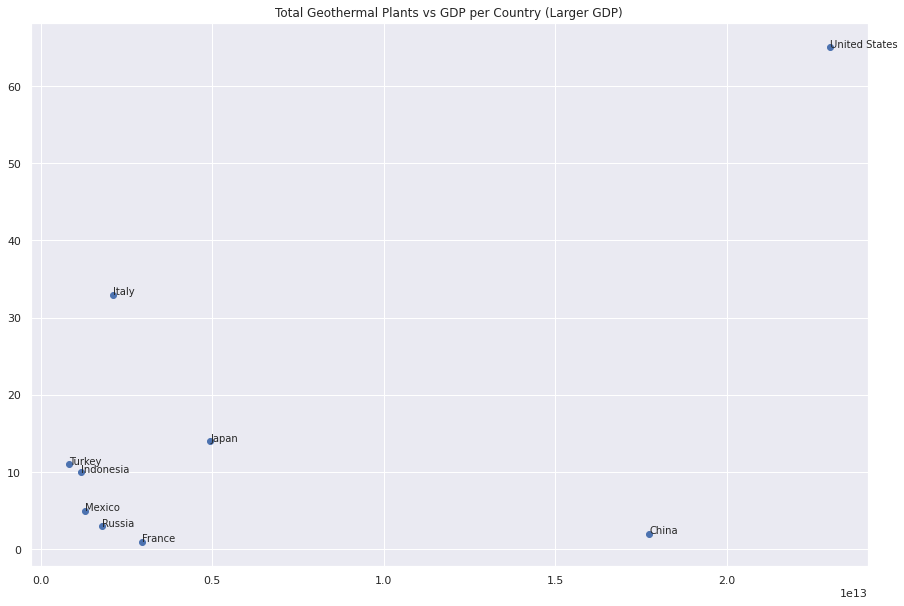

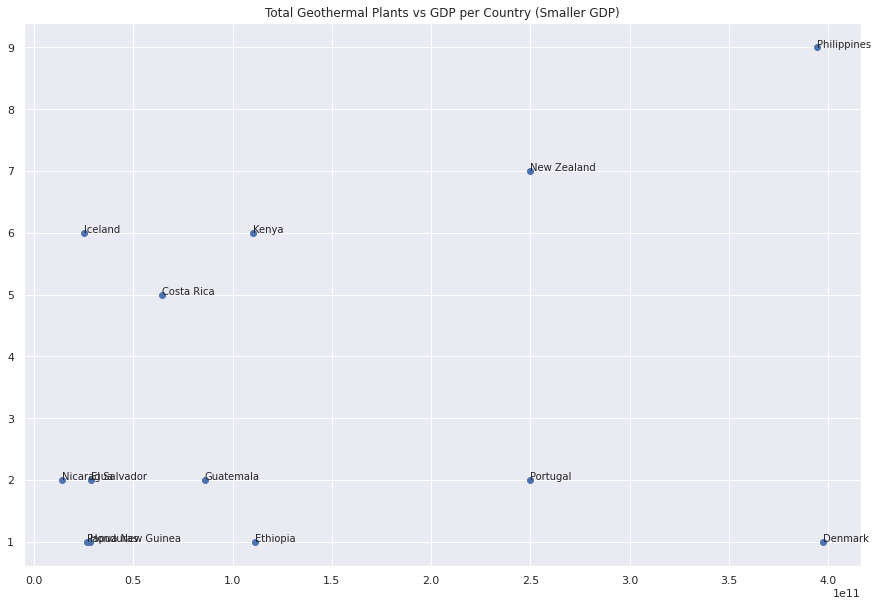

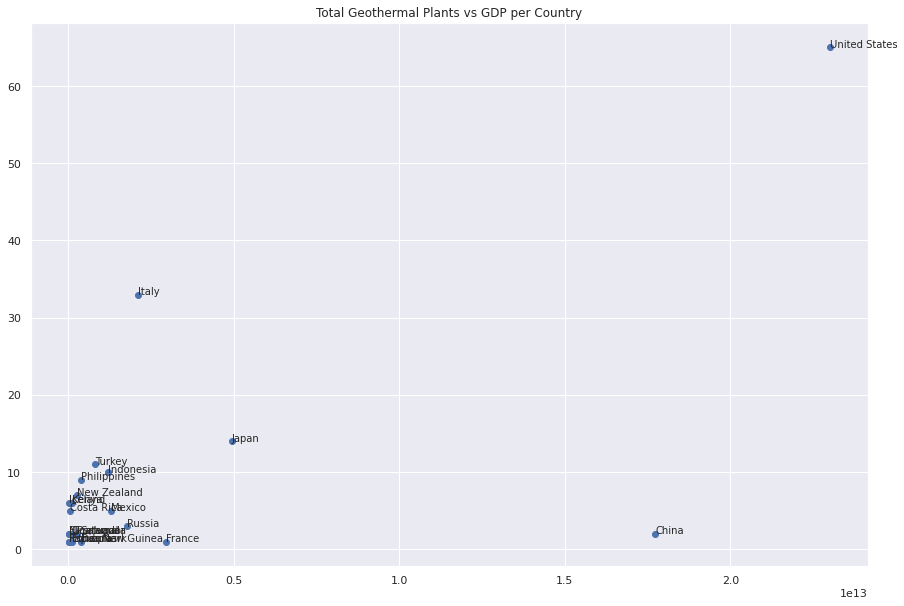

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#using elbow test from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

df_cluster_large = pd.DataFrame(df_cluster[df_cluster['Country Name'].isin(['Italy','Japan','China','United States','France','Turkey','Russia','Indonesia','Mexico'])])
df_cluster_large = df_cluster_large.reset_index()
#print(df_cluster_large)

df_cluster_small = df_cluster[df_cluster['Country Name'].isin(['Philippines','New Zealand','Kenya','Iceland','Costa Rica','Portugal','Nicaragua','El Salvador','Guatemala','Ethiopia','Papua New Guinea','Denmark','Honduras'])]
df_cluster_small = df_cluster_small.reset_index()
#print(df_cluster_small)

#plotting the points of df_cluster
plt.figure(figsize=(15,10)) 
plt.plot()
plt.title('Total Geothermal Plants vs GDP per Country (Larger GDP)')
plt.scatter(df_cluster_large["GDP in 2021"],df_cluster_large["Total Plants"])
for i, label in enumerate(df_cluster_large["Country Name"]):
    print(label, "  ", df_cluster_large["Total Plants"][i], "  ", df_cluster_large["GDP in 2021"][i])
    plt.annotate(label, (df_cluster_large["GDP in 2021"][i],df_cluster_large["Total Plants"][i]))
plt.show()

#plotting the points of df_cluster
plt.figure(figsize=(15,10)) 
plt.plot()
plt.title('Total Geothermal Plants vs GDP per Country (Smaller GDP)')
plt.scatter(df_cluster_small["GDP in 2021"],df_cluster_small["Total Plants"])
for i, label in enumerate(df_cluster_small["Country Name"]):
    plt.annotate(label, (df_cluster_small["GDP in 2021"][i],df_cluster_small["Total Plants"][i]))
plt.show()

#plotting the points of df_cluster
plt.figure(figsize=(15,10)) 
plt.plot()
plt.title('Total Geothermal Plants vs GDP per Country')
plt.scatter(df_cluster["GDP in 2021"],df_cluster["Total Plants"])
for i, label in enumerate(df_cluster["Country Name"]):
    plt.annotate(label, (df_cluster["GDP in 2021"][i],df_cluster["Total Plants"][i]))
plt.show()

In [ ]:
#obtaining values for distortions and inertias
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

df_kmeans = df_cluster[["GDP in 2021","Total Plants"]]
df_labels = df_cluster["Country Name"]
  
for k in K:
    # Building and fitting the model
    km = KMeans(n_clusters=k).fit(df_kmeans)
    km.fit(df_kmeans)
  
    distortions.append(sum(np.min(cdist(df_kmeans, km.cluster_centers_,
                                        'euclidean'), axis=1)) / df_kmeans.shape[0])
    inertias.append(km.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df_kmeans, km.cluster_centers_,
                                   'euclidean'), axis=1)) / df_kmeans.shape[0]
    mapping2[k] = km.inertia_

1 : 3467213677966.7593
2 : 1073759711043.8113
3 : 648062461043.9341
4 : 408878944924.45215
5 : 227060538525.50525
6 : 153998810458.6863
7 : 107850609520.66641
8 : 67487861110.21311
9 : 46634223483.81404


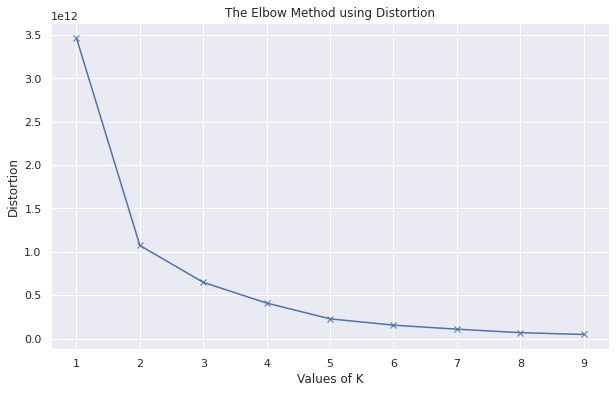

1 : 7.375029240301512e+26
2 : 4.447049452688946e+25
3 : 2.250268646491473e+25
4 : 8.658167904161348e+24
5 : 2.659618710285242e+24
6 : 1.0527099539737876e+24
7 : 4.1002020233076273e+23
8 : 2.1149785125980108e+23
9 : 9.148110163290326e+22


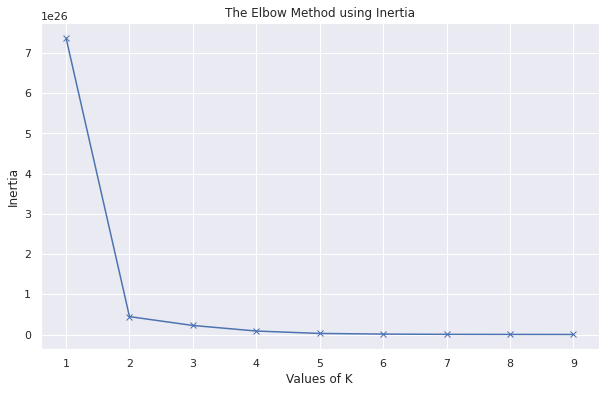

In [ ]:
#visualizing results for distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#visualizing results for inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

(4, 2)


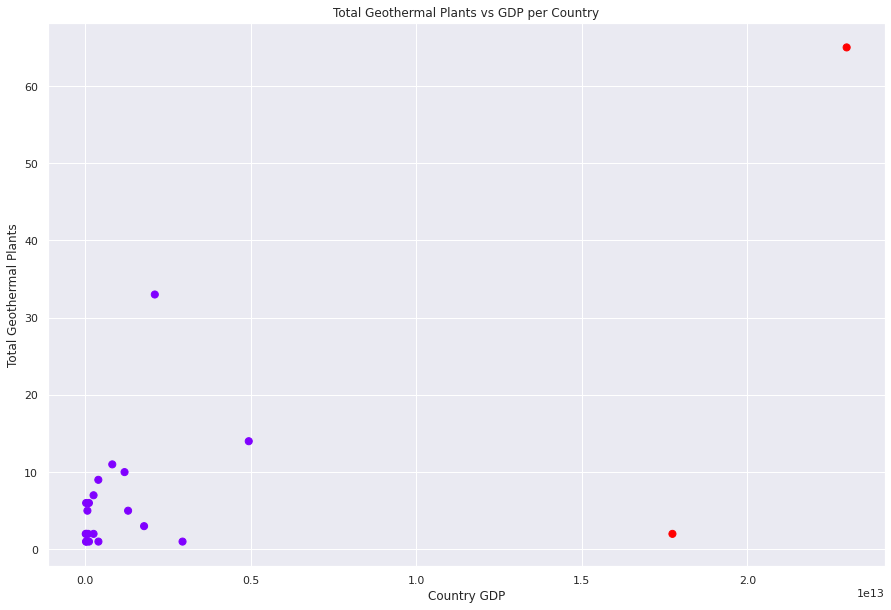

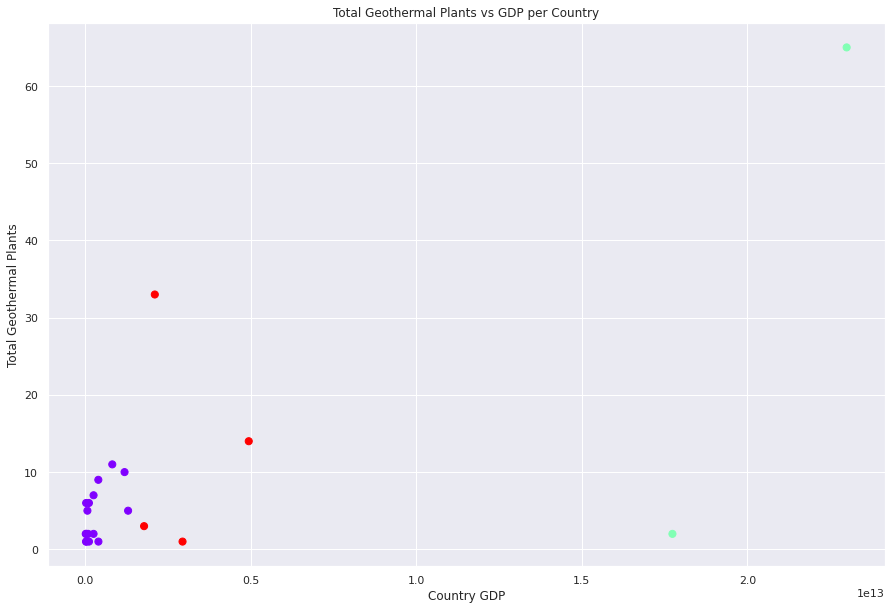

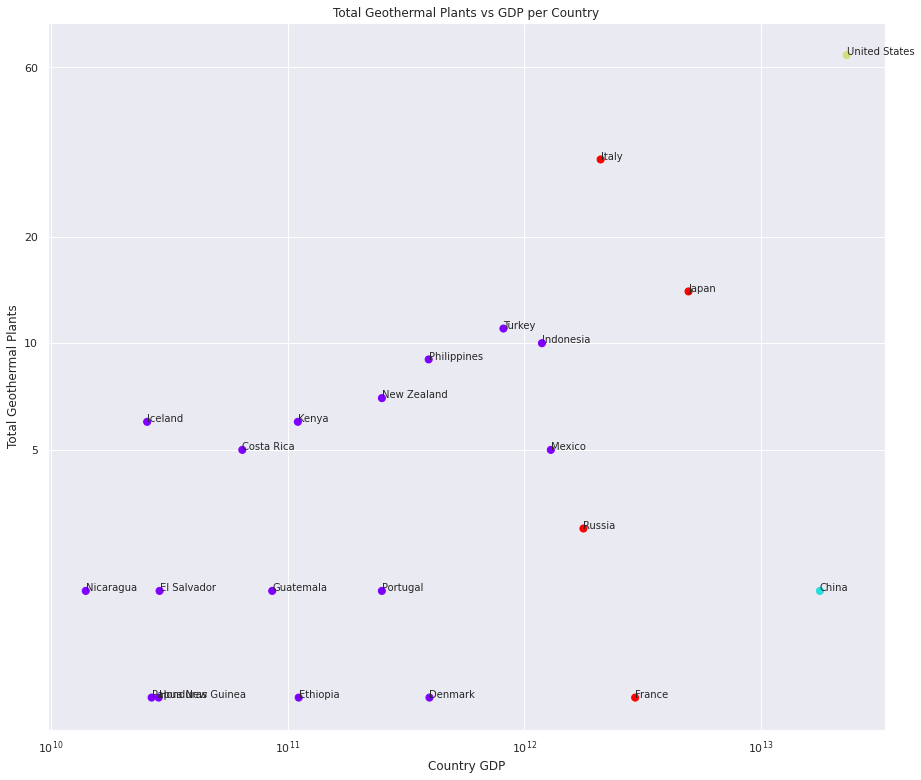

In [ ]:
#the optimal number of clusters is 2
# df_cluster = df_cluster.drop(columns=["Country Name"])
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(df_kmeans)
print(kmeans.cluster_centers_.shape)

plt.figure(figsize=(15,10)) 
plt.plot()
plt.title('Total Geothermal Plants vs GDP per Country')
plt.ylabel('Total Geothermal Plants')
plt.xlabel('Country GDP')
labels = KMeans(n_clusters=2, random_state=42).fit_predict(df_kmeans)
plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], c=labels, s=50, cmap='rainbow');

plt.figure(figsize=(15,10)) 
plt.plot()
plt.title('Total Geothermal Plants vs GDP per Country')
plt.ylabel('Total Geothermal Plants')
plt.xlabel('Country GDP')
labels = KMeans(n_clusters=3, random_state=42).fit_predict(df_kmeans)
plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], c=labels, s=50, cmap='rainbow');

plt.figure(figsize=(15,13))
plt.plot() 
plt.title('Total Geothermal Plants vs GDP per Country')
plt.ylabel('Total Geothermal Plants')
plt.xlabel('Country GDP')
plt.yscale("log")
y_ticks = [0,5,10, 20, 60]
y_labels = [0,5,10, 20, 60] 
plt.yticks(ticks=y_ticks, labels=y_labels)

x_ticks = [0, 0.25, 0.5, 1, 2]
x_labels = [0, 0.25, 0.5, 1, 2] 
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xscale("log")

labels = KMeans(n_clusters=4, random_state=42).fit_predict(df_kmeans)
plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], c=labels, s=50, cmap='rainbow');
for i, label in enumerate(df_cluster["Country Name"]):
    plt.annotate(label, (df_cluster["GDP in 2021"][i], df_cluster["Total Plants"][i]))
plt.show()

In [ ]:
#comparing clusters for solar and hydro

df_solar = df[df['primary_fuel'] == 'Solar']

df_hydro = df[df['primary_fuel'] == 'Hydro']

df_solar

In [ ]:
solar_plant_series = df_solar['country_long'].value_counts()
df_plant_solar = pd.DataFrame({'Country Name':solar_plant_series.index, 'Total Plants': solar_plant_series.values})

df_countries = df_gdp[["Country Name", "2021"]]
df_cluster_solar = pd.merge(df_plant_solar, df_countries, on='Country Name')
# df_plant
US_GDP = df_countries[df_countries["Country Name"] == "United States"]["2021"].values[0]
US_plants = df_plant_solar[df_plant_solar["Country Name"] == "United States of America"]["Total Plants"].values[0]
Russia_GDP = df_countries[df_countries["Country Name"] == "Russian Federation"]["2021"].values[0]
Russia_plants = df_plant_solar[df_plant_solar["Country Name"] == "Russia"]["Total Plants"].values[0]
Turkey_GDP = df_countries[df_countries["Country Name"] == "Turkiye"]["2021"].values[0]
Turkey_plants = df_plant_solar[df_plant_solar["Country Name"] == "Turkey"]["Total Plants"].values[0]

df_cluster_solar.loc[len(df_cluster_solar.index)] = ['United States', US_plants, US_GDP] 
df_cluster_solar.loc[len(df_cluster_solar.index)] = ['Russia', Russia_plants, Russia_GDP]
df_cluster_solar.loc[len(df_cluster_solar.index)] = ['Turkey', Turkey_plants, Turkey_GDP]

df_cluster_solar.rename(columns={"2021":"GDP in 2021"}, inplace=True)
df_cluster_solar

hydro_plant_series = df_hydro['country_long'].value_counts()
df_plant_hydro = pd.DataFrame({'Country Name':hydro_plant_series.index, 'Total Plants': hydro_plant_series.values})

df_countries = df_gdp[["Country Name", "2021"]]
df_cluster_hydro = pd.merge(df_plant_hydro, df_countries, on='Country Name')
# df_plant
US_GDP = df_countries[df_countries["Country Name"] == "United States"]["2021"].values[0]
US_plants = df_plant_hydro[df_plant_hydro["Country Name"] == "United States of America"]["Total Plants"].values[0]
Syrian_GDP = 21445775.36
Syrian_plants = df_plant_hydro[df_plant_hydro["Country Name"] == "Syrian Arab Republic"]["Total Plants"].values[0]
Russia_GDP = df_countries[df_countries["Country Name"] == "Russian Federation"]["2021"].values[0]
Russia_plants = df_plant_hydro[df_plant_hydro["Country Name"] == "Russia"]["Total Plants"].values[0]
Turkey_GDP = df_countries[df_countries["Country Name"] == "Turkiye"]["2021"].values[0]
Turkey_plants = df_plant_hydro[df_plant_hydro["Country Name"] == "Turkey"]["Total Plants"].values[0]

df_cluster_hydro.loc[len(df_cluster_hydro.index)] = ['United States', US_plants, US_GDP] 
df_cluster_hydro.loc[len(df_cluster_hydro.index)] = ['Russia', Russia_plants, Russia_GDP]
df_cluster_hydro.loc[len(df_cluster_hydro.index)] = ['Turkey', Turkey_plants, Turkey_GDP]
df_cluster_hydro.loc[78] = ['Syrian Arab Republic', Syrian_plants, Syrian_GDP]

df_cluster_hydro.rename(columns={"2021":"GDP in 2021"}, inplace=True)
df_cluster_hydro

,Country Name,Total Plants,GDP in 2021
0,China,947,1.773406e+13
1,Brazil,701,1.608981e+12
2,Canada,556,1.990762e+12
3,France,429,2.937473e+12
4,Norway,291,4.824370e+11
5,India,233,3.173398e+12
6,Vietnam,174,3.626375e+11
7,Switzerland,162,8.128669e+11
8,Sweden,142,6.274379e+11
9,Spain,124,1.425277e+12


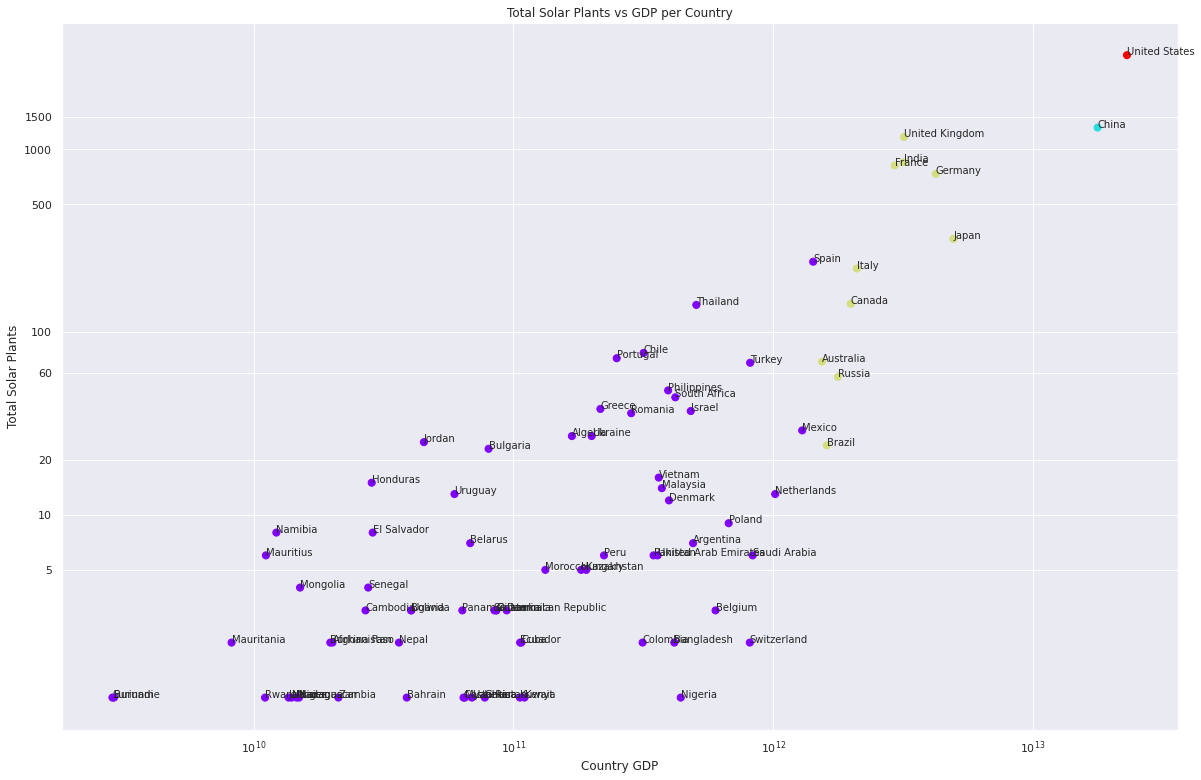

In [ ]:
df_kmeans_solar = df_cluster_solar[["GDP in 2021","Total Plants"]]
df_labels_solar = df_cluster_solar["Country Name"]

plt.figure(figsize=(20,13)) 
plt.plot()
plt.title('Total Solar Plants vs GDP per Country')
plt.ylabel('Total Solar Plants')
plt.xlabel('Country GDP')
plt.yscale("log")
y_ticks = [0,5,10, 20, 60, 100, 500, 1000, 1500]
y_labels = [0,5,10, 20, 60, 100, 500, 1000, 1500] 
plt.yticks(ticks=y_ticks, labels=y_labels)

x_ticks = [0, 0.25, 0.5, 1, 2]
x_labels = [0, 0.25, 0.5, 1, 2] 
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xscale("log")

labels_solar = KMeans(n_clusters=4, random_state=42).fit_predict(df_kmeans_solar)
plt.scatter(df_kmeans_solar.iloc[:, 0], df_kmeans_solar.iloc[:, 1], c=labels_solar, s=50, cmap='rainbow');
for i, label in enumerate(df_labels_solar):
    plt.annotate(label, (df_cluster_solar["GDP in 2021"][i], df_cluster_solar["Total Plants"][i]))
plt.show()

(4, 2)


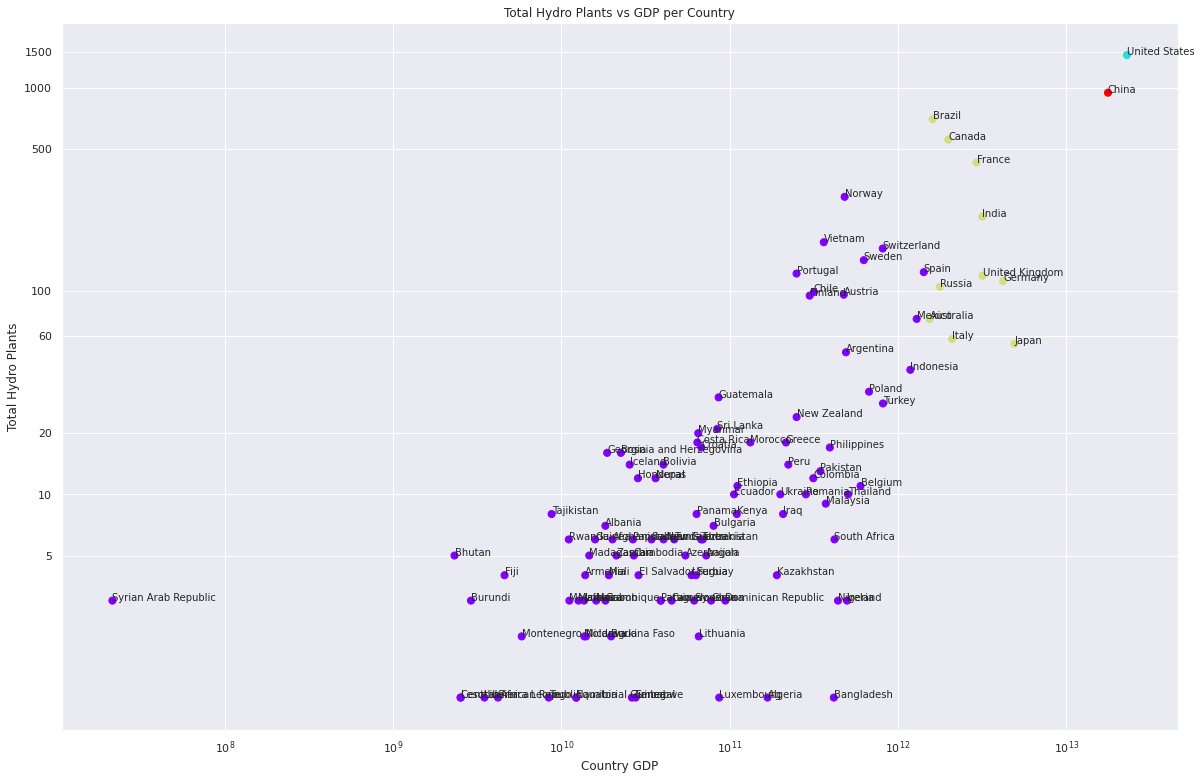

In [ ]:
df_kmeans_hydro = df_cluster_hydro[["GDP in 2021","Total Plants"]]
df_labels_hydro = df_cluster_hydro["Country Name"]

kmeans_hydro = KMeans(n_clusters=4)
clusters_hydro = kmeans_hydro.fit_predict(df_kmeans_hydro)
print(kmeans_hydro.cluster_centers_.shape)

plt.figure(figsize=(20,13)) 
plt.plot()
plt.title('Total Hydro Plants vs GDP per Country')
plt.ylabel('Total Hydro Plants')
plt.xlabel('Country GDP')
plt.yscale("log")
y_ticks = [0,5,10, 20, 60, 100, 500, 1000, 1500]
y_labels = [0,5,10, 20, 60, 100, 500, 1000, 1500] 
plt.yticks(ticks=y_ticks, labels=y_labels)

x_ticks = [0, 0.5, 1, 2]
x_labels = [0, 0.5, 1, 2] 
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xscale("log")

labels_hydro = KMeans(n_clusters=4, random_state=42).fit_predict(df_kmeans_hydro)
labels_hydro
plt.scatter(df_kmeans_hydro.iloc[:, 0], df_kmeans_hydro.iloc[:, 1], c=labels_hydro, s=50, cmap='rainbow');
for i, label in enumerate(df_labels_hydro):
    plt.annotate(label, (df_cluster_hydro["GDP in 2021"][i], df_cluster_hydro["Total Plants"][i]))
plt.show()